In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import random
import time
import matplotlib.pyplot as plt

from skimage.transform import resize
from tqdm import tqdm # progress which the model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../GalaxyZoo/training_solutions_rev1.csv')
print("El dataset tiene " + str(df.shape[0]) + " filas y " + str(df.shape[1]) + " columnas.")
df.head()

El dataset tiene 61578 filas y 38 columnas.


,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


## Separamos entre training y testing

In [3]:
df_train, df_test = train_test_split(df[:30000], test_size=0.2, random_state=42)
print("El conjunto de entrenamiento tiene forma", df_train.shape)
print("El conjunto de prueba tiene forma", df_test.shape)

El conjunto de entrenamiento tiene forma (24000, 38)
El conjunto de prueba tiene forma (6000, 38)


In [4]:
df_train.describe()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,320594.056208,0.430368,0.544842,0.024790,0.107513,0.437329,0.102317,0.335012,0.217030,0.220299,...,0.033109,0.092307,0.084450,0.040273,0.015441,0.094735,0.017811,0.007573,0.007093,0.074375
std,126619.098983,0.282792,0.295557,0.037028,0.213953,0.302244,0.177002,0.248387,0.285987,0.179451,...,0.099073,0.145359,0.140342,0.101303,0.052082,0.194877,0.068275,0.038224,0.037687,0.107902
min,100008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,209654.500000,0.176245,0.285108,0.000000,0.000000,0.169317,0.000000,0.123459,0.000000,0.072815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,323148.500000,0.414047,0.561662,0.014683,0.000000,0.399377,0.000000,0.292182,0.094934,0.184943,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,429132.500000,0.675712,0.811246,0.033935,0.087150,0.696268,0.134753,0.520171,0.336768,0.338788,...,0.000000,0.148840,0.127553,0.030458,0.000000,0.098276,0.000000,0.000000,0.000000,0.129786
max,540177.000000,1.000000,1.000000,0.935147,1.000000,1.000000,1.000000,1.000000,1.000000,0.925311,...,0.901991,0.949733,0.850616,0.991539,0.825312,1.000000,0.975913,0.957000,0.938881,0.664057


## Exploratory Data Analysis para las imagenes

In [5]:
trainPath = '../GalaxyZoo/images_training_rev1/'
testPath = '../GalaxyZoo/images_test_rev1/'

In [6]:
def plot_random_galaxy(path, sample = 5):
    random_image=random.sample(os.listdir(path),sample) #Lista todo los archivos en el directorio y selecciona 'sample' aleatoriamente
 
    plt.figure(figsize=(16,5))
    for i in range(sample):
        
        plt.subplot(1,sample,i+1) #
        img=tf.io.read_file(os.path.join(path,random_image[i])) # construye ruta completa (ej: 'GalaxyZoo/images_training_rev1/123.jpg' 
        img=tf.io.decode_image(img)
        plt.imshow(img)
        plt.title(f'Class: {random_image[i]}\nShape: {img.shape}')
        plt.axis(False) 

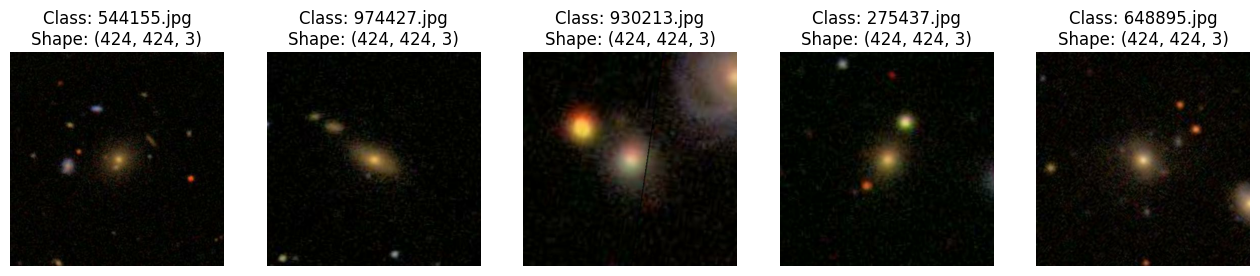

In [7]:
plot_random_galaxy(trainPath)

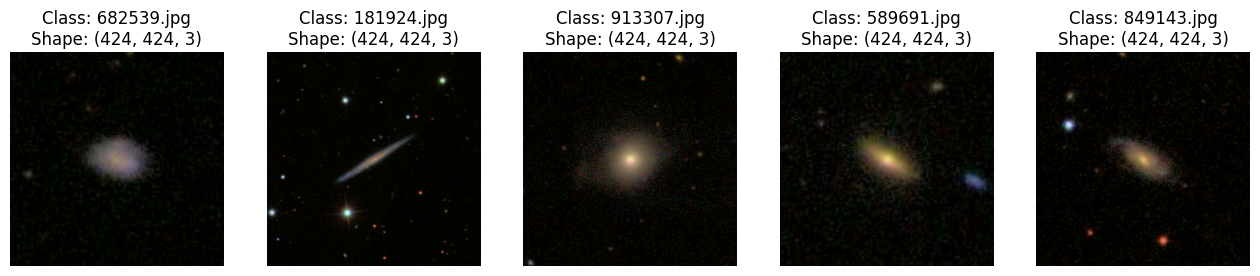

In [8]:
plot_random_galaxy(testPath)

In [9]:
ORIG_SHAPE = (424,424)
CROP_SIZE = (256,256)
IMG_SHAPE = (64,64)

tt = time.time()
def get_image(path, x1, y1, shape, crop_size): #Lee la imagen desde el path, la recorta y la redimensiona
    # Usar TensorFlow para leer la imagen (igual que en plot_random_galaxy que funciona)
    img = tf.io.read_file(path)
    img = tf.io.decode_image(img, channels=3)
    img = tf.cast(img, tf.float32)  # Convertir a float32
    
    # Recortar
    img = img[x1:x1+crop_size[0], y1:y1+crop_size[1]]
    
    # Redimensionar
    img = tf.image.resize(img, shape)
    
    # Normalizar (tf.io.decode_image devuelve 0-255 para JPG)
    img = img / 255.0
    
    return img.numpy()
    
def get_all_images(dataframe, shape=IMG_SHAPE, crop_size=CROP_SIZE): #Obtiene todas las imágenes del dataframe, las recorta y redimensiona
    x1 = (ORIG_SHAPE[0]-CROP_SIZE[0])//2
    y1 = (ORIG_SHAPE[1]-CROP_SIZE[1])//2
   
    sel = dataframe.values
    ids = sel[:,0].astype(int).astype(str)
    y_batch = sel[:,1:]
    x_batch = []
    for i in tqdm(ids):
        x = get_image('../GalaxyZoo/images_training_rev1/'+i+'.jpg', x1, y1, shape=shape, crop_size=crop_size)
        x_batch.append(x)
    x_batch = np.array(x_batch)
    return x_batch, y_batch
        
X_train, y_train = get_all_images(df_train)
X_test, y_test = get_all_images(df_test)
print('Procesado en: ', (time.time()-tt)/60, " minutos")


  0%|          | 0/24000 [00:00<?, ?it/s]

100%|██████████| 6000/6000 [00:15<00:00, 391.59it/s]

Procesado en:  1.3650437752405802  minutos


In [10]:
print("Forma del train: ",X_train.shape)
print("Forma del train: ",X_test.shape)

Forma del train:  (24000, 64, 64, 3)
Forma del train:  (6000, 64, 64, 3)


## Creamos la red neuronal

In [11]:
# Verificar disponibilidad de GPU
print("=" * 60)
print("VERIFICACIÓN DE GPU")
print("=" * 60)

# Listar dispositivos
gpus = tf.config.list_physical_devices('GPU')
cpus = tf.config.list_physical_devices('CPU')

print(f"\n✓ GPUs disponibles: {len(gpus)}")
for gpu in gpus:
    print(f"  - {gpu}")
    
print(f"\n✓ CPUs disponibles: {len(cpus)}")
for cpu in cpus:
    print(f"  - {cpu}")

# Verificar si CUDA está disponible
print(f"\n✓ TensorFlow versión: {tf.__version__}")
print(f"✓ Built with CUDA: {tf.test.is_built_with_cuda()}")

# Habilitar crecimiento de memoria GPU (evita OOM)
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("\n✓ Crecimiento de memoria GPU habilitado")
    except RuntimeError as e:
        print(f"\n✗ Error configurando memoria: {e}")
else:
    print("\n⚠ ADVERTENCIA: No se detectaron GPUs. El entrenamiento será MÁS LENTO.")

print("=" * 60 + "\n")

VERIFICACIÓN DE GPU

✓ GPUs disponibles: 0

✓ CPUs disponibles: 1
  - PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')

✓ TensorFlow versión: 2.13.1
✓ Built with CUDA: False

⚠ ADVERTENCIA: No se detectaron GPUs. El entrenamiento será MÁS LENTO.



In [12]:
# Estrategia de distribución para GPU
strategy = None
if gpus:
    print(f"Usando {len(gpus)} GPU(s) para entrenamiento")
    strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
else:
    print("Usando CPU para entrenamiento")
    strategy = tf.distribute.get_strategy()

print(f"Número de réplicas: {strategy.num_replicas_in_sync}\n")

Usando CPU para entrenamiento
Número de réplicas: 1



In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalMaxPooling2D
from keras import backend as K
from tensorflow.keras import layers, models #type: ignore
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping #type: ignore

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),  # Rotación aleatoria del 20%
    layers.RandomZoom(0.1),
])

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Crear el modelo dentro de la estrategia de distribución
with strategy.scope():
    model = Sequential([
        tf.keras.Input(shape=(IMG_SHAPE[0], IMG_SHAPE[1], 3)),
        data_augmentation,
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        #layers.Dense(128, activation='relu'),
        #layers.Dropout(0.5),
        #layers.Dense(64, activation='relu'),
        #layers.Dropout(0.2),
        layers.Dense(37, activation='sigmoid')
    ])

    model.compile(optimizer=opt,
                  loss=root_mean_squared_error,
                  metrics=['mse'])
                  
model.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_mse', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
# Detiene el entrenamiento si no mejora para evitar overfitting
early_stop = EarlyStopping(monitor='val_mse', mode='min', patience=10, restore_best_weights=True, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 62, 62, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 128)      

In [14]:
print("\n" + "="*60)
print("INICIANDO ENTRENAMIENTO")
print("="*60)

t = time.time()
ep = 30

# Entrenar con callbacks y monitoreo
history = model.fit(
    X_train, y_train, 
    epochs=ep, 
    batch_size=256,  # Aumentar batch_size también ayuda a GPU
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, early_stop],
    verbose=1  # Mostrar progreso detallado
)

tiempo_entrenamiento = time.time() - t
print(f"\n✓ Tiempo de entrenamiento: {tiempo_entrenamiento:.2f} segundos")
print(f"✓ Tiempo promedio por epoch: {tiempo_entrenamiento/ep:.2f} segundos")
print(f"\n✓ Tiempo de entrenamiento: {tiempo_entrenamiento/60:.2f} minutos")
print(f"✓ Tiempo promedio por epoch: {tiempo_entrenamiento/(ep*60):.2f} minutos")
print("="*60)


INICIANDO ENTRENAMIENTO
Epoch 1/30
94/94 [==============================] - 129s 1s/step - loss: 0.1769 - mse: 0.0338 - val_loss: 0.2507 - val_mse: 0.0628 - lr: 0.0010
Epoch 2/30
94/94 [==============================] - 135s 1s/step - loss: 0.1370 - mse: 0.0188 - val_loss: 0.1962 - val_mse: 0.0385 - lr: 0.0010
Epoch 3/30
94/94 [==============================] - 135s 1s/step - loss: 0.1261 - mse: 0.0159 - val_loss: 0.1947 - val_mse: 0.0379 - lr: 0.0010
Epoch 4/30
94/94 [==============================] - 136s 1s/step - loss: 0.1205 - mse: 0.0145 - val_loss: 0.1979 - val_mse: 0.0392 - lr: 0.0010
Epoch 5/30
94/94 [==============================] - 133s 1s/step - loss: 0.1172 - mse: 0.0137 - val_loss: 0.1983 - val_mse: 0.0393 - lr: 0.0010
Epoch 6/30
94/94 [==============================] - 120s 1s/step - loss: 0.1145 - mse: 0.0131 - val_loss: 0.1831 - val_mse: 0.0336 - lr: 0.0010
Epoch 7/30
94/94 [==============================] - 122s 1s/step - loss: 0.1121 - mse: 0.0126 - val_loss: 0.169

PREDICCIONES EN CONJUNTO DE TRAINING

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9716
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 19532
Clases con probabilidad real > 0.5:
  Clase 0: 0.8520
  Clase 14: 0.5866
  Clase 15: 0.5395

Clases con probabilidad predicha > 0.5:
  Clase 0: 0.6212
  Clase 14: 0.7751

Accuracy en esta muestra: 97.30%

DEBUG Muestra 2:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9422
  Shape imagen: (64, 64, 3)

Muestra 2 - Índice: 17598
Clases con probabilidad real > 0.5:
  Clase 1: 0.5099
  Clase 4: 0.5099
  Clase 14: 0.5361

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.5344
  Clase 14: 0.7227

Accuracy en esta muestra: 97.30%

DEBUG Muestra 3:
  Min valor imagen: 0.0000
  Max valor imagen: 0.8745
  Shape imagen: (64, 64, 3)

Muestra 3 - Índice: 3269
Clases con probabilidad real > 0.5:
  Clase 14: 0.8593

Clases con probabilidad predicha > 0.5:
  Clase 0: 0.5674
  Clase 14: 0.7452

Accuracy en esta muestra: 97.30%


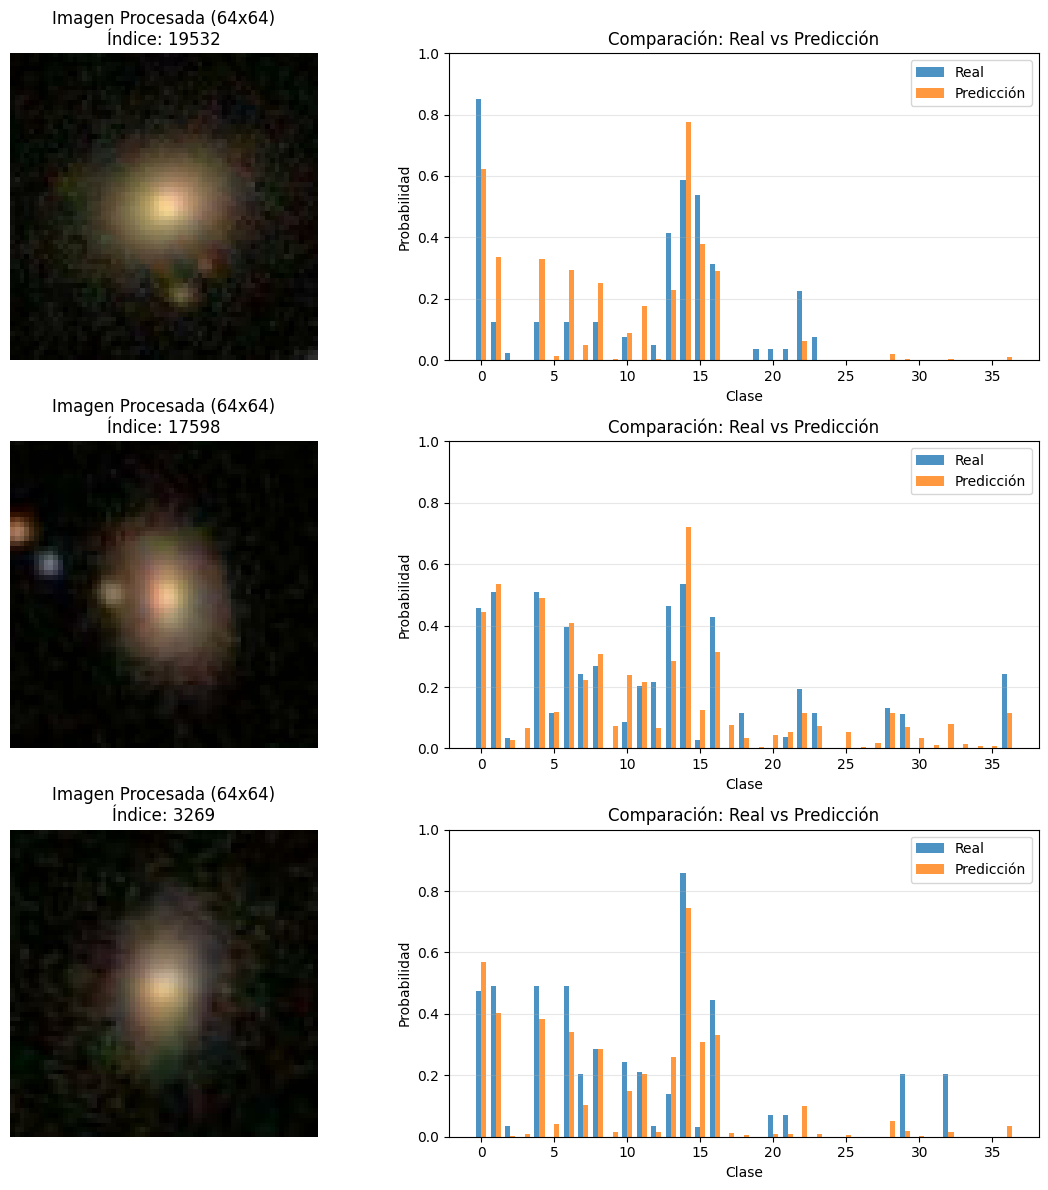



PREDICCIONES EN CONJUNTO DE TEST

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.8951
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 3192
Clases con probabilidad real > 0.5:
  Clase 1: 0.5681
  Clase 4: 0.5001
  Clase 14: 0.8804

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.6643
  Clase 4: 0.5416
  Clase 14: 0.7263

Accuracy en esta muestra: 100.00%

DEBUG Muestra 2:
  Min valor imagen: 0.0000
  Max valor imagen: 0.5990
  Shape imagen: (64, 64, 3)

Muestra 2 - Índice: 4373
Clases con probabilidad real > 0.5:
  Clase 1: 0.8652
  Clase 4: 0.8402
  Clase 6: 0.7437
  Clase 7: 0.6295
  Clase 10: 0.6453
  Clase 14: 0.9611

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.8650
  Clase 4: 0.8285
  Clase 6: 0.5737
  Clase 7: 0.5755
  Clase 14: 0.6458

Accuracy en esta muestra: 97.30%

DEBUG Muestra 3:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9039
  Shape imagen: (64, 64, 3)

Muestra 3 - Índice: 2432
Clases con probabilidad real > 0.5:
  Clase 0: 0.9711

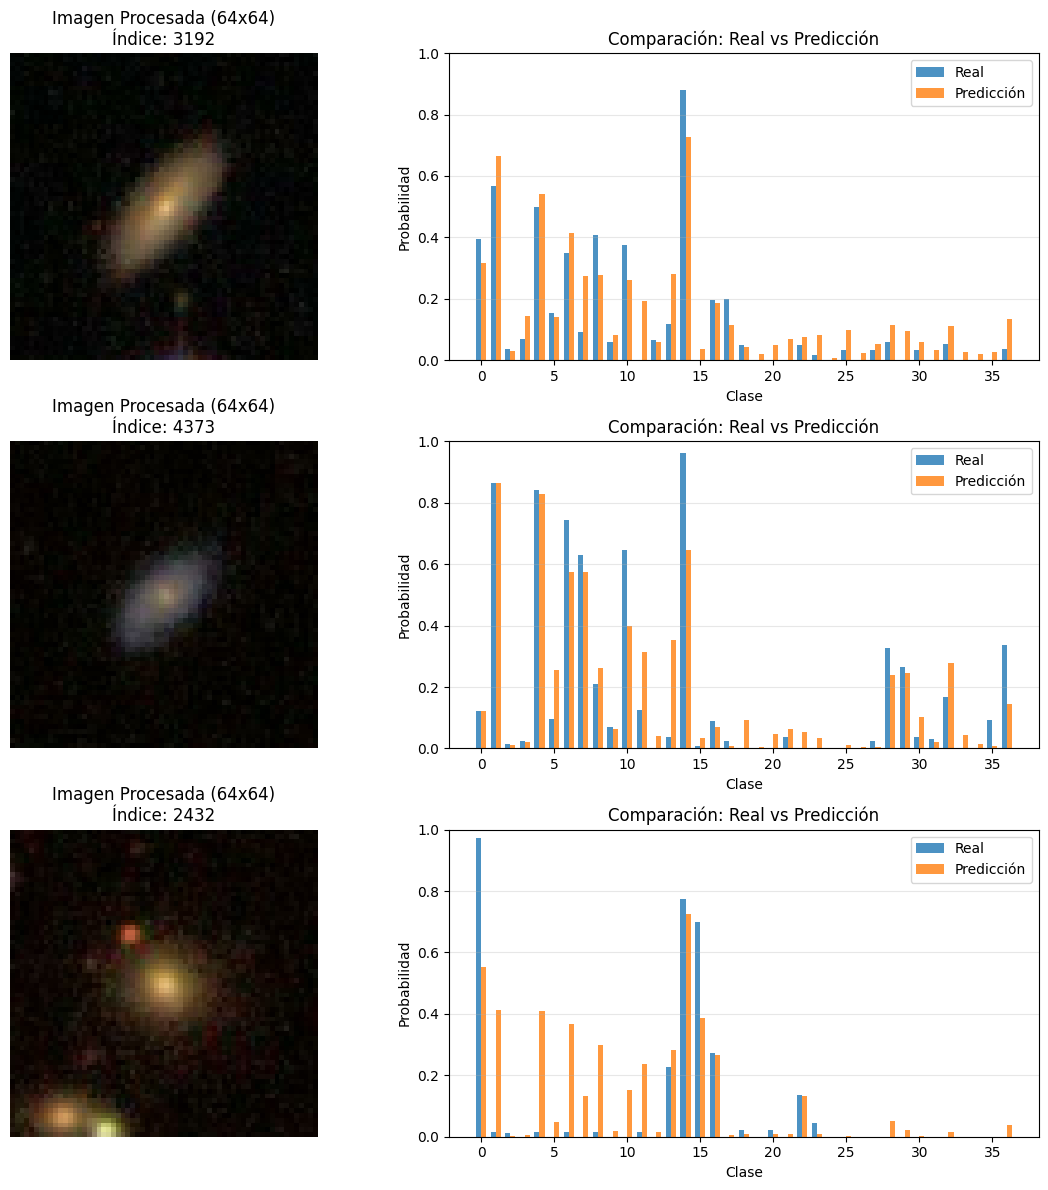



UNA SOLA MUESTRA

DEBUG Muestra 1:
  Min valor imagen: 0.0000
  Max valor imagen: 0.9176
  Shape imagen: (64, 64, 3)

Muestra 1 - Índice: 5153
Clases con probabilidad real > 0.5:
  Clase 0: 0.7798
  Clase 14: 0.8935
  Clase 15: 0.5153

Clases con probabilidad predicha > 0.5:
  Clase 1: 0.5331
  Clase 4: 0.5084
  Clase 14: 0.7079

Accuracy en esta muestra: 89.19%


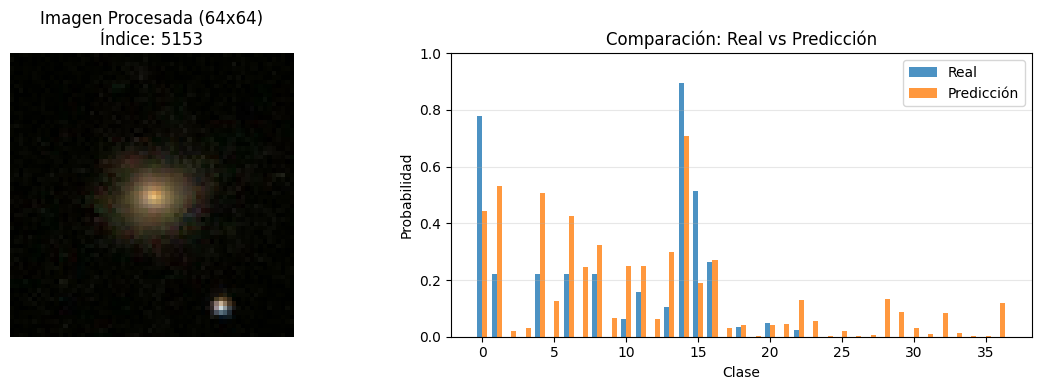

In [33]:
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from skimage.transform import resize

def predict_random_galaxy(model, X_data, y_data, data_path, num_samples=3):
    """
    Visualiza predicciones del modelo en imágenes random
    
    Args:
        model: Modelo entrenado
        X_data: Datos de imágenes procesadas (train o test)
        y_data: Etiquetas reales (train o test)
        data_path: Ruta de las imágenes originales
        num_samples: Número de muestras a visualizar
    """
    
    # Seleccionar índices random
    random_indices = random.sample(range(len(X_data)), num_samples)
    
    fig, axes = plt.subplots(num_samples, 2, figsize=(12, 4*num_samples))
    
    if num_samples == 1:
        axes = [axes]
    
    for idx, random_idx in enumerate(random_indices):
        # Obtener imagen procesada y etiqueta real
        img_processed = X_data[random_idx]
        y_real = y_data[random_idx]
        
        # Hacer predicción
        y_pred = model.predict(np.expand_dims(img_processed, axis=0), verbose=0)[0]
        
        # DEBUG: Verificar valores de la imagen
        print(f"\nDEBUG Muestra {idx+1}:")
        print(f"  Min valor imagen: {img_processed.min():.4f}")
        print(f"  Max valor imagen: {img_processed.max():.4f}")
        print(f"  Shape imagen: {img_processed.shape}")
        
        # Mostrar imagen procesada (izquierda) - Asegurar que se muestre correctamente
        # vmin y vmax garantizan que matplotlib interprete bien los valores normalizados
        axes[idx][0].imshow(img_processed, vmin=0, vmax=1, cmap='viridis')
        axes[idx][0].set_title(f'Imagen Procesada (64x64)\nÍndice: {random_idx}')
        axes[idx][0].axis('off')
        
        # Mostrar gráfico de predicciones vs reales (derecha)
        x_pos = np.arange(len(y_real))
        width = 0.35
        
        axes[idx][1].bar(x_pos - width/2, y_real, width, label='Real', alpha=0.8)
        axes[idx][1].bar(x_pos + width/2, y_pred, width, label='Predicción', alpha=0.8)
        axes[idx][1].set_xlabel('Clase')
        axes[idx][1].set_ylabel('Probabilidad')
        axes[idx][1].set_title(f'Comparación: Real vs Predicción')
        axes[idx][1].legend()
        axes[idx][1].set_ylim([0, 1])
        axes[idx][1].grid(axis='y', alpha=0.3)
        
        # Imprimir información detallada
        print(f"\n{'='*60}")
        print(f"Muestra {idx+1} - Índice: {random_idx}")
        print(f"{'='*60}")
        print(f"Clases con probabilidad real > 0.5:")
        for i, prob in enumerate(y_real):
            if prob > 0.5:
                print(f"  Clase {i}: {prob:.4f}")
        
        print(f"\nClases con probabilidad predicha > 0.5:")
        for i, prob in enumerate(y_pred):
            if prob > 0.5:
                print(f"  Clase {i}: {prob:.4f}")
        
        # Calcular accuracy por muestra
        accuracy = np.mean((y_pred > 0.5) == (y_real > 0.5))
        print(f"\nAccuracy en esta muestra: {accuracy*100:.2f}%")
    
    plt.tight_layout()
    plt.show()

# ============================================
# USAR LA FUNCIÓN
# ============================================

# Opción 1: Predecir en imágenes de TRAINING
print("PREDICCIONES EN CONJUNTO DE TRAINING")
predict_random_galaxy(model, X_train, y_train, trainPath, num_samples=3)

# Opción 2: Predecir en imágenes de TEST
print("\n\nPREDICCIONES EN CONJUNTO DE TEST")
predict_random_galaxy(model, X_test, y_test, testPath, num_samples=3)

# Opción 3: Una sola muestra específica
print("\n\nUNA SOLA MUESTRA")
predict_random_galaxy(model, X_test, y_test, testPath, num_samples=1)
